##Predictive Modeling with pyPCM##

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter('ignore', DeprecationWarning)

In [3]:
data = pd.read_csv('HD_data.csv')

In [4]:
data.head(5)

,Activity,Compound,SubFPC1,SubFPC2,SubFPC3,SubFPC4,SubFPC5,SubFPC6,SubFPC7,SubFPC8,...,m10z2p7,m10z2p8,m10z3p1,m10z3p2,m10z3p3,m10z3p4,m10z3p5,m10z3p6,m10z3p7,m10z3p8
0,Active,CHEMBL2000089,0,9,0,0,0,0,0,0,...,-1.73,-0.97,0.57,0.57,2.36,-3.14,-3.44,-1.03,0.09,4.13
1,Active,CHEMBL99,2,0,1,0,2,0,0,0,...,-1.73,-0.97,0.57,0.57,2.36,-3.14,-3.44,-1.03,0.09,4.13
2,Active,CHEMBL2047701,0,1,0,0,0,0,0,0,...,-1.73,-0.97,0.57,0.57,2.36,-3.14,-3.44,-1.03,0.09,4.13
3,Active,CHEMBL343448,5,2,2,0,1,0,0,0,...,-1.73,-0.97,0.57,0.57,2.36,-3.14,-3.44,-1.03,0.09,4.13
4,Active,CHEMBL360194,2,8,0,0,0,0,0,0,...,-1.73,-0.97,0.57,0.57,2.36,-3.14,-3.44,-1.03,0.09,4.13


In [5]:
data.count()

Activity    22800
Compound    22800
SubFPC1     22800
SubFPC2     22800
SubFPC3     22800
SubFPC4     22800
SubFPC5     22800
SubFPC6     22800
SubFPC7     22800
SubFPC8     22800
SubFPC9     22800
SubFPC10    22800
SubFPC11    22800
SubFPC12    22800
SubFPC13    22800
...
m10z2p2    22800
m10z2p3    22800
m10z2p4    22800
m10z2p5    22800
m10z2p6    22800
m10z2p7    22800
m10z2p8    22800
m10z3p1    22800
m10z3p2    22800
m10z3p3    22800
m10z3p4    22800
m10z3p5    22800
m10z3p6    22800
m10z3p7    22800
m10z3p8    22800
Length: 937, dtype: int64

In [6]:
compound = data.iloc[:, 2:309]

In [7]:
compound.count()

SubFPC1     22800
SubFPC2     22800
SubFPC3     22800
SubFPC4     22800
SubFPC5     22800
SubFPC6     22800
SubFPC7     22800
SubFPC8     22800
SubFPC9     22800
SubFPC10    22800
SubFPC11    22800
SubFPC12    22800
SubFPC13    22800
SubFPC14    22800
SubFPC15    22800
...
SubFPC293    22800
SubFPC294    22800
SubFPC295    22800
SubFPC296    22800
SubFPC297    22800
SubFPC298    22800
SubFPC299    22800
SubFPC300    22800
SubFPC301    22800
SubFPC302    22800
SubFPC303    22800
SubFPC304    22800
SubFPC305    22800
SubFPC306    22800
SubFPC307    22800
Length: 307, dtype: int64

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(compound)
print(pca.explained_variance_)
print(pca.components_)

[ 253.06246322   43.74058158]
[[  2.66742429e-02   6.88682835e-02   1.45269733e-02   5.83758974e-03
    1.94859050e-03   1.03105901e-04   3.30872245e-24  -1.09551304e-04
   -3.81705419e-03  -9.28833712e-06   7.63449665e-06   6.94634156e-03
    6.39591534e-04   3.97779072e-03   2.32895930e-03   1.95705000e-03
    5.14850727e-04   2.32251138e-03  -1.46616703e-04  -6.59608162e-04
   -5.67672428e-05   0.00000000e+00   1.98332758e-03   5.23524074e-06
    0.00000000e+00   7.40540385e-04  -1.86045595e-06  -4.90669202e-05
    0.00000000e+00   0.00000000e+00   0.00000000e+00   3.97802394e-04
    1.30169676e-03   0.00000000e+00   5.01722954e-05   1.99907935e-04
   -6.22681892e-07  -6.85278136e-04   6.86217326e-05   1.05219436e-04
    8.45607667e-04  -4.08061920e-06   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   7.17480058e-05
    1.33390681e-03   0.00000000e+00   8.04687583e-06   2.51032412e-05
    4.44793469e-04   3.61188118e-05   2.11198513e-05   5.767

###Explained Variance Plot for Compound###

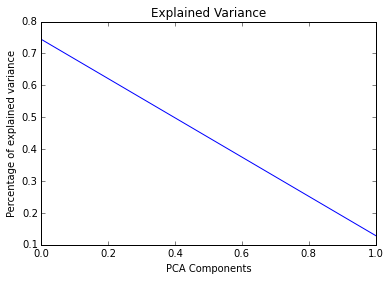

In [10]:
plt.title("Explained Variance")
plt.ylabel("Percentage of explained variance")
plt.xlabel("PCA Components")
plt.plot(pca.explained_variance_ratio_);

###Cumulated Explained Variance plot for Compound###

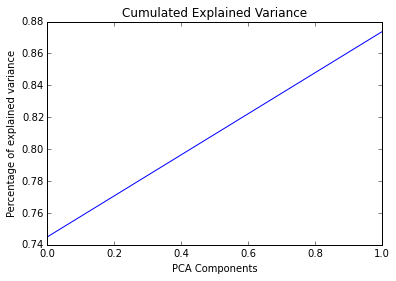

In [11]:
plt.title("Cumulated Explained Variance")
plt.ylabel("Percentage of explained variance")
plt.xlabel("PCA Components")
plt.plot(np.cumsum(pca.explained_variance_ratio_));

In [12]:
compound = compound
activity = data.iloc[:, 0]

###Data Partition###

In [43]:
from sklearn.cross_validation import train_test_split
compound_train, compound_test, activity_train, activity_test = train_test_split(
    compound, activity, test_size = 0.20, random_state = 0)
print("train data shape: %r, train target shape: %r"
     % (compound_train.shape, activity_train.shape))
print("test data shape: %r, test target shape: %r"
     % (compound_test.shape, activity_test.shape))

train data shape: (18240, 307), train target shape: (18240,)
test data shape: (4560, 307), test target shape: (4560,)


###Classification with Logistic Regression###

In [44]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1)
logreg.fit(compound_train, activity_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [45]:
activity_predicted = logreg.predict(compound_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(activity_test, activity_predicted)

0.9765350877192982

###Feature Importance from Logistic Regression###

In [47]:
compound_descriptors = compound.columns
compound_descriptors

Index(['SubFPC1', 'SubFPC2', 'SubFPC3', 'SubFPC4', 'SubFPC5', 'SubFPC6', 'SubFPC7', 'SubFPC8', 'SubFPC9', 'SubFPC10', 'SubFPC11', 'SubFPC12', 'SubFPC13', 'SubFPC14', 'SubFPC15', 'SubFPC16', 'SubFPC17', 'SubFPC18', 'SubFPC19', 'SubFPC20', 'SubFPC21', 'SubFPC22', 'SubFPC23', 'SubFPC24', 'SubFPC25', 'SubFPC26', 'SubFPC27', 'SubFPC28', 'SubFPC29', 'SubFPC30', 'SubFPC31', 'SubFPC32', 'SubFPC33', 'SubFPC34', 'SubFPC35', 'SubFPC36', 'SubFPC37', 'SubFPC38', 'SubFPC39', 'SubFPC40', 'SubFPC41', 'SubFPC42', 'SubFPC43', 'SubFPC44', 'SubFPC45', 'SubFPC46', 'SubFPC47', 'SubFPC48', 'SubFPC49', 'SubFPC50', 'SubFPC51', 'SubFPC52', 'SubFPC53', 'SubFPC54', 'SubFPC55', 'SubFPC56', 'SubFPC57', 'SubFPC58', 'SubFPC59', 'SubFPC60', 'SubFPC61', 'SubFPC62', 'SubFPC63', 'SubFPC64', 'SubFPC65', 'SubFPC66', 'SubFPC67', 'SubFPC68', 'SubFPC69', 'SubFPC70', 'SubFPC71', 'SubFPC72', 'SubFPC73', 'SubFPC74', 'SubFPC75', 'SubFPC76', 'SubFPC77', 'SubFPC78', 'SubFPC79', 'SubFPC80', 'SubFPC81', 'SubFPC82', 'SubFPC83', 'SubFP

In [48]:
logreg.coef_

array([[  8.01093500e-01,   1.35822836e-01,  -6.98952430e-02,
         -4.82642854e-01,  -1.72416728e+00,  -3.73300332e-01,
          0.00000000e+00,   3.64199065e-01,  -1.06611181e-01,
          3.46809995e-02,   1.50630652e-02,   1.09390589e+00,
         -1.75323876e-01,   2.53032187e-01,   1.01619758e+00,
          2.02943764e+00,   2.81571145e+00,   1.46681479e+00,
          1.20457430e+00,   2.45309490e+00,   2.09710585e+00,
          0.00000000e+00,   1.85716915e-01,  -7.02275390e-01,
          0.00000000e+00,  -2.59493086e-01,   3.14698619e-01,
         -1.77390221e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.80832494e+00,   1.42461499e-01,
          0.00000000e+00,  -1.26020906e+00,  -2.96083782e+00,
          1.99965061e+00,   2.37983977e+00,  -1.52899569e+00,
         -3.40705664e-01,   1.37304375e-01,   1.95128624e-03,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   6.03503900e-01,
        

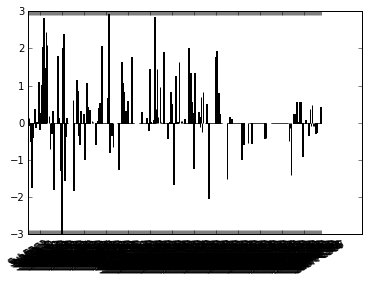

In [49]:
x = np.arange(len(compound_descriptors))
plt.bar(x, logreg.coef_.ravel())
plt.xticks(x + 0.5, compound_descriptors, rotation = 30);

In [50]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(activity_test, activity_predicted)
print(cm)

[[  23   93]
 [  14 4430]]


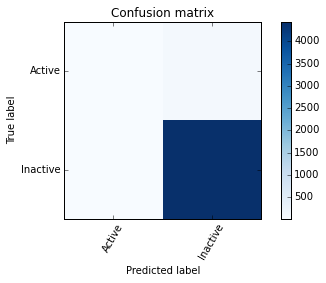

In [51]:
def plot_confusion(cm, activity_names = ['Active', 'Inactive'],
                  title = 'Confusion matrix'):
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(activity_names))
    plt.xticks(tick_marks, activity_names, rotation = 60)
    plt.yticks(tick_marks, activity_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

plot_confusion(cm)

In [52]:
print(cm)

[[  23   93]
 [  14 4430]]


In [53]:
cm.sum(axis =1)

array([ 116, 4444])

In [54]:
cm_normalized = cm.astype(np.float64) / cm.sum(axis = 1)[:, np.newaxis]
print(cm_normalized)

[[ 0.19827586  0.80172414]
 [ 0.00315032  0.99684968]]


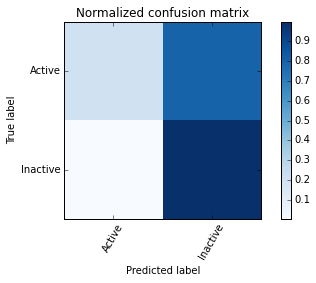

In [55]:
plot_confusion(cm_normalized, title = "Normalized confusion matrix")

In [56]:
from sklearn.metrics import classification_report

print(classification_report(activity_test, activity_predicted,
                           target_names = ['Inactive', 'Active']))

             precision    recall  f1-score   support

   Inactive       0.62      0.20      0.30       116
     Active       0.98      1.00      0.99      4444

avg / total       0.97      0.98      0.97      4560



In [57]:
activity_predicted_proba = logreg.predict_proba(compound_test)
activity_predicted_proba[:5]

array([[ 0.00113849,  0.99886151],
       [ 0.02121255,  0.97878745],
       [ 0.03190176,  0.96809824],
       [ 0.00221402,  0.99778598],
       [ 0.00181644,  0.99818356]])

In [60]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


def plot_roc_curve(activity_test, activity_predicted_proba):
    fpr, tpr, thresholds = roc_curve(activity_test, 
                                     activity_predicted_proba[:, 1],
                                     pos_label = 'Active')
    
    roc_auc = auc(fpr, tpr)
    #Plot ROC curve
    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.3f)' %roc_auc)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specificity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operation Characteristic for Histone Acetylase')
    plt.legend(loc = 'lower right')

In [62]:
fpr, tpr, thresholds = roc_curve(activity_test, activity_predicted_proba[:, 1],
                                pos_label = 'Active')

###ROC Curve for compound alone###

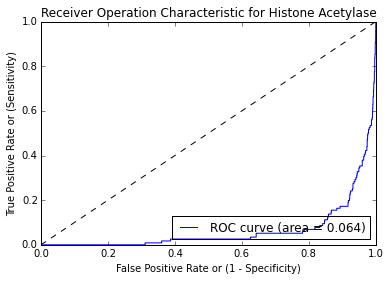

In [65]:
plot_roc_curve(activity_test, activity_predicted_proba)

###Principal Component Analysis for Protein###

In [64]:
protein = data.iloc[:, 311:937]

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(protein)
print(pca.explained_variance_)
print(pca.components_)

[ 671.9186243   148.05358522]
[[ -5.37984500e-02   3.05210694e-02  -1.38777878e-17 ...,   2.29204059e-02
    5.92913660e-04   9.84543516e-03]
 [ -1.57921818e-02   5.45986027e-03   2.22044605e-16 ...,  -9.06756612e-03
   -3.03772321e-03  -3.06035965e-04]]


###Explained Variance Plot for Protein###

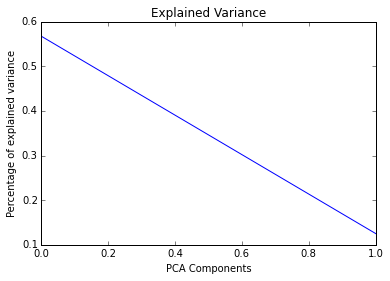

In [70]:
plt.title("Explained Variance")
plt.ylabel("Percentage of explained variance")
plt.xlabel("PCA Components")
plt.plot(pca.explained_variance_ratio_);

###Cumulated Explained Variance plot for Protein

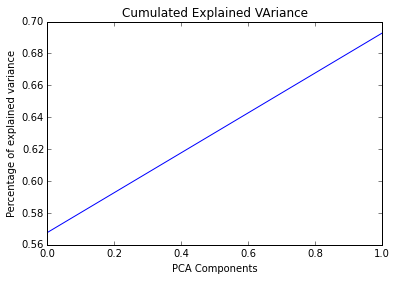

In [73]:
plt.title("Cumulated Explained VAriance")
plt.ylabel("Percentage of explained variance")
plt.xlabel("PCA Components")
plt.plot(np.cumsum(pca.explained_variance_ratio_));

###Data Partition###

In [75]:
from sklearn.cross_validation import train_test_split
protein_train, protein_test, activity_train, activity_test = train_test_split(
    protein, activity, test_size = 0.20, random_state = 0)
print("train data shape: %r, trian target shape: %r"
     % (protein_train.shape, activity_train.shape))
print("test data shape: %r, test target shape: %r"
     % (protein_test.shape, activity_test.shape))

train data shape: (18240, 626), trian target shape: (18240,)
test data shape: (4560, 626), test target shape: (4560,)


###Classification with Logistic Regression###

In [77]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression (C = 1)
logreg.fit(protein_train, activity_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [80]:
activity_predicted = logreg.predict(protein_test)

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(activity_test, activity_predicted)

0.97456140350877196

###Feature Importance from Logistic Regression###

In [82]:
protein_descriptors = protein.columns
protein_descriptors

Index(['m1z1p2', 'm1z1p3', 'm1z1p4', 'm1z1p5', 'm1z1p6', 'm1z1p7', 'm1z1p8', 'm1z1p9', 'm1z1p10', 'm1z1p11', 'm1z1p12', 'm1z1p13', 'm1z1p14', 'm1z1p15', 'm1z1p16', 'm1z1p17', 'm1z1p18', 'm1z1p19', 'm1z1p20', 'm1z1p21', 'm1z1p22', 'm1z1p23', 'm1z1p24', 'm1z1p25', 'm1z1p26', 'm1z1p27', 'm1z1p28', 'm1z1p29', 'm1z2p1', 'm1z2p2', 'm1z2p3', 'm1z2p4', 'm1z2p5', 'm1z2p6', 'm1z2p7', 'm1z2p8', 'm1z2p9', 'm1z2p10', 'm1z2p11', 'm1z2p12', 'm1z2p13', 'm1z2p14', 'm1z2p15', 'm1z2p16', 'm1z2p17', 'm1z2p18', 'm1z2p19', 'm1z2p20', 'm1z2p21', 'm1z2p22', 'm1z2p23', 'm1z2p24', 'm1z2p25', 'm1z2p26', 'm1z2p27', 'm1z2p28', 'm1z2p29', 'm1z3p1', 'm1z3p2', 'm1z3p3', 'm1z3p4', 'm1z3p5', 'm1z3p6', 'm1z3p7', 'm1z3p8', 'm1z3p9', 'm1z3p10', 'm1z3p11', 'm1z3p12', 'm1z3p13', 'm1z3p14', 'm1z3p15', 'm1z3p16', 'm1z3p17', 'm1z3p18', 'm1z3p19', 'm1z3p20', 'm1z3p21', 'm1z3p22', 'm1z3p23', 'm1z3p24', 'm1z3p25', 'm1z3p26', 'm1z3p27', 'm1z3p28', 'm1z3p29', 'm2z1p1', 'm2z1p2', 'm2z1p3', 'm2z1p4', 'm2z1p5', 'm2z1p6', 'm2z1p7', 'm2

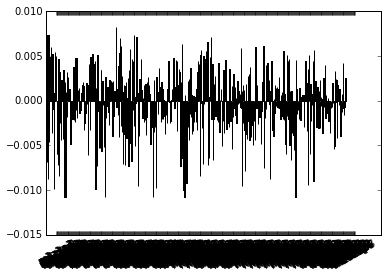

In [84]:
x = np.arange(len(protein_descriptors))
plt.bar(x, logreg.coef_.ravel())
plt.xticks(x + 20, protein_descriptors, rotation = 30);

In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(activity_test, activity_predicted)
print(cm)

[[   0  116]
 [   0 4444]]


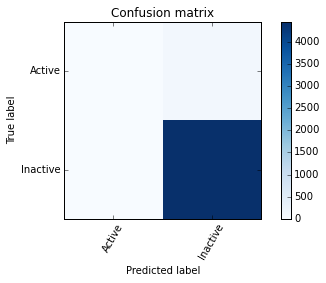

In [86]:
plot_confusion(cm)

In [87]:
cm_normalized = cm.astype(np.float64) / cm.sum(axis = 1)[:, np.newaxis]
print(cm_normalized)

[[ 0.  1.]
 [ 0.  1.]]


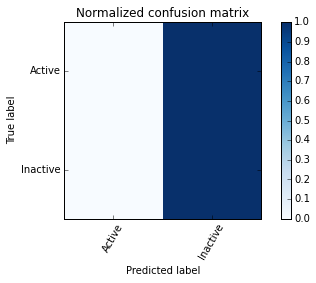

In [88]:
plot_confusion(cm_normalized, title = "Normalized confusion matrix")

In [90]:
from sklearn.metrics import classification_report 

print(classification_report(activity_test, activity_predicted,
                           target_names = ['Active', 'Inactive']))

             precision    recall  f1-score   support

     Active       0.00      0.00      0.00       116
   Inactive       0.97      1.00      0.99      4444

avg / total       0.95      0.97      0.96      4560



In [92]:
activity_predicted_proba = logreg.predict_proba(protein_test)
activity_predicted_proba[:5]

array([[ 0.02521799,  0.97478201],
       [ 0.02535162,  0.97464838],
       [ 0.02521799,  0.97478201],
       [ 0.02222358,  0.97777642],
       [ 0.02524507,  0.97475493]])

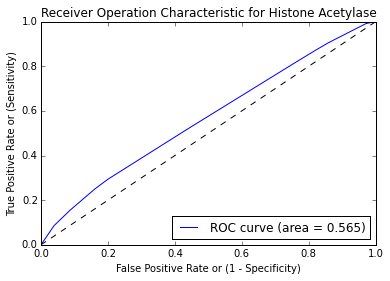

In [93]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
plot_roc_curve(activity_test, activity_predicted_proba)

In [99]:
def cross_terms_ligand_protein(ligand, header_ligand, protein, header_protein):
    import numpy as np
    R, Cl = np.shape(ligand)
    R, Cp = np.shape(protein)
    Cross_lp = np.zeros((R, 1))
    H_lp = []
    for j in range(Cl):
        for jj in range(Cp):
            H_lp.append(header_ligand[j]+'*'+header_protein[jj])
            cross = np.multiply(ligand[:,j], protein[:, jj])
            Cross_lp = np.append(Cross_lp, np.reshape(cross, (ligand.shape[0],1)),
                                axis = 1)
            return np.delete(Cross_lp, 0, axis = 1), H_lp
        

In [100]:
cross_terms = cross_terms_ligand_protein(ligand = compound,
                                        header_ligand = compound_descriptors,
                                        protein = protein,
                                        header_protein = protein_descriptors)

TypeError: unhashable type: 'slice'